#           *HandWritten Telugu Character Recognition

#                  using Convolutional Neural Network

       By Team Analytiacal Eyes
            Team members -   Rahul Sharma
                             K.mahesh
                             Mohammad Mazid
                             P.Satya
                             Marthala Guruchakradhar Reddy

#         *under the Guidence of - Mr. R. Raja Subramanian*

# Project Implementation

In [ ]:
# project is divide into 2 parts

     #  1 - Building the Deep Learning Model
     #  2 - building the userinterface 

# *Building The Deep learning Model*

In [2]:
# importing the Required Packages and Libraries for loading the Dataset

import os
import cv2
import numpy as np

# *Loading The Dataset

In [3]:
path=r"C:/Users/lenovo/Desktop/IEEE_TELUGU_dataset"
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(50,50,3)

In [4]:
myList=os.listdir(path)

numOfClasses=len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
    myPicList=os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg=cv2.imread(path+"/"+str(x)+"/"+y)
        curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
        images.append(curImg)
        classNo.append(x)
    print(x)

images=np.array(images)
classNo=np.array(classNo)

Importing Classes..........
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


# *Splitting the Dataset into Train , Test & validation

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

In [6]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(30720, 50, 50, 3) (30720,)
(9600, 50, 50, 3) (9600,)


# *Visualizing the Dataset.......

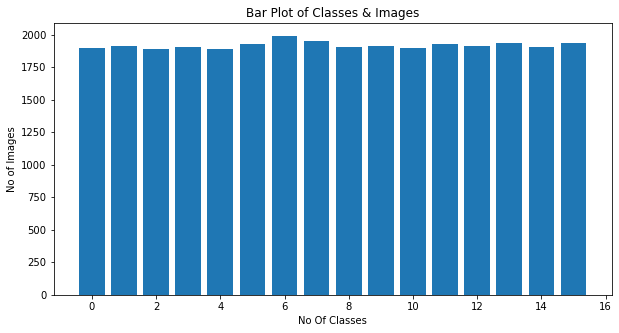

In [7]:
import matplotlib.pyplot as plt


numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

# *Preprocessing the Image Dataset

In [8]:
def preprocessing(img):
    #img=np.astype("uint8")
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [10]:


x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)

In [61]:
# *Loading the packages and Libraries For Building the CNN deep Learning Model

import tensorflow as tf
from tensorflow import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten

In [11]:
# CNN Model

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(50,50,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(16,activation="softmax"))
model.summary()







 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         1

In [15]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
,metrics=["accuracy"])

In [19]:
history=model.fit(dataGen.flow(x_train, y_train),
    batch_size = 96,
	epochs=10,

	validation_data=(x_validation,y_validation))

model.save("Telugu_Character_Recognition_System33.h5")
print("Model Trained & saved Successfully")


Epoch 1/10
960/960 [==============================] - 2667s 3s/step - loss: 2.5233 - accuracy: 0.1965 - val_loss: 2.1018 - val_accuracy: 0.3328
Epoch 2/10
960/960 [==============================] - 2888s 3s/step - loss: 1.9518 - accuracy: 0.3880 - val_loss: 1.4996 - val_accuracy: 0.5072
Epoch 3/10
960/960 [==============================] - 3133s 3s/step - loss: 1.5798 - accuracy: 0.4922 - val_loss: 1.2268 - val_accuracy: 0.6017
Epoch 4/10
960/960 [==============================] - 2165s 2s/step - loss: 1.3908 - accuracy: 0.5465 - val_loss: 1.0911 - val_accuracy: 0.6456
Epoch 5/10
960/960 [==============================] - 2249s 2s/step - loss: 1.2737 - accuracy: 0.5818 - val_loss: 0.9533 - val_accuracy: 0.6820
Epoch 6/10
960/960 [==============================] - 2223s 2s/step - loss: 1.2002 - accuracy: 0.6068 - val_loss: 0.8876 - val_accuracy: 0.7104
Epoch 7/10
960/960 [==============================] - 2258s 2s/step - loss: 1.1370 - accuracy: 0.6275 - val_loss: 0.8165 - val_accuracy:

In [20]:
model.save("Telugu_Character_Recognition_System33.h5")
print("Model Trained & saved Successfully")

Model Trained & saved Successfully


In [21]:
model.evaluate(x_test,y_test)

300/300 [==============================] - 155s 514ms/step - loss: 0.7221 - accuracy: 0.7605


[0.7220911979675293, 0.7605208158493042]

In [22]:
model.evaluate(x_train,y_train)

960/960 [==============================] - 504s 525ms/step - loss: 0.6681 - accuracy: 0.7822


[0.6681011319160461, 0.7821614742279053]

In [36]:
model.evaluate(x_validation,y_validation)

240/240 [==============================] - 125s 516ms/step - loss: 0.7354 - accuracy: 0.7533


[0.7353927493095398, 0.7532551884651184]

Text(0, 0.5, 'Accuracy')

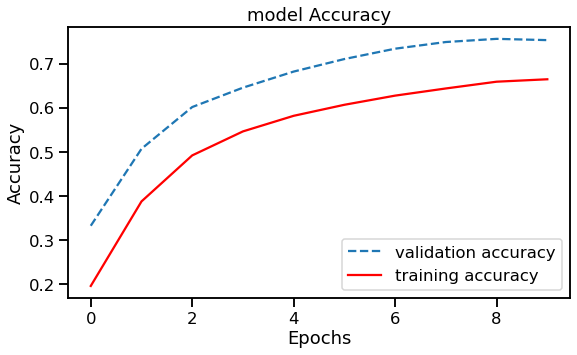

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.figure(figsize=(9,5))
plt.title("model Accuracy")
#plt.plot(range(0,5),hist.history["accuracy"])
plt.plot(range(0,10),history.history["val_accuracy"],linestyle="--",label="validation accuracy")
plt.plot(range(0,10),history.history["accuracy"],label="training accuracy",color="red")
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

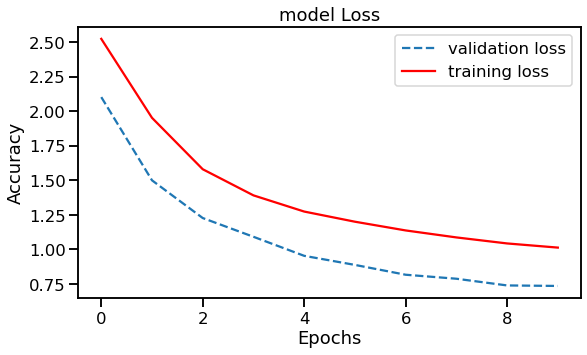

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.figure(figsize=(9,5))
plt.title("model Loss")
#plt.plot(range(0,5),hist.history["accuracy"])
plt.plot(range(0,10),history.history["val_loss"],linestyle="--",label="validation loss")
plt.plot(range(0,10),history.history["loss"],label="training loss",color="red")
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Accuracy")

# *User interface 

In [1]:
# importing all the Packages and Libraries

import os
from tkinter import *
import PIL
from PIL import ImageGrab

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from PIL import Image, ImageEnhance
import cv2
from keras.models import load_model

In [2]:
def preprocessing(img):
    img=img.astype("uint8")
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img = img/255
    return img 

In [3]:
def get_className(classNo):
    if classNo==0:
        return "అ -A"
    elif classNo==1:
        return "ఆ -AA"
    elif classNo==2:
            return "ఇ -I"
    elif classNo==3:
        return "ఈ -EE"
    elif classNo==4:
        return "అఉ – U"
    elif classNo==5:
        return "ఊ- UU"
    elif classNo==6:
        return "ఋ – RU"
    elif classNo==7:
        return "ౠ -ROO"
    elif classNo==8:
        return "ఎ – E"
    elif classNo==9:
        return "అః – AHAA"
    elif classNo==10:
        return "ఐ – AI/AY"
    elif classNo==11:
        return "ఒ – O"
    elif classNo==12:
        return "ఓ – OO"
    elif classNo==13:
        return "ఔ – AU"
    elif classNo==14:
        return "అం – AUM"
    elif classNo==15:
        return "ఏ – YE"
    else :
        return "Did'nt Recognised the character .. please Draw again"

In [9]:
class main:
    def __init__(self, master):
        self.master = master
        self.res = ""
        self.pre = [None, None]
        self.bs = 8.5
        self.c = Canvas(self.master,bd=8,relief="ridge", width=325, height=450, bg='white')
        self.c.pack(side=LEFT)
        f1 = Frame(self.master, padx=5, pady=5)
        Label(f1,text="*********************************************************************************************",fg="green",font=("",15)).pack()
        Label(f1,text="Handwritten Telugu Character Recognition System",fg="blue",font=("",25,"bold")).pack(pady=10)
        Label(f1,text="Developed by Team - Analytical Eyes",fg="black",font=("",20)).pack()
        Label(f1,text="P.satya ,  Rahul sharma,  K.Mahesh, Mohammad mazid, M .Guruchakradhar Reddy",fg="green",font=("",20)).pack()
        Label(f1,text="                                             ",fg="red",font=("",20)).pack()
        Label(f1,text=" under the Guidance of Mr. R Raja Subramanian",fg="red",font=("",20)).pack()
        Label(f1,text="<<<< Draw On The Canvas Alongside",fg="black",font=("",15,"bold")).pack()
        self.pr = Label(f1,text="Prediction: None",fg="blue",font=("",45,"bold"))
        self.pr.pack(pady=20)
        
        Button(f1,font=("",15),fg="white",bg="red" ,text="Clear Canvas", command=self.clear).pack(side=BOTTOM)

        f1.pack(side=RIGHT,fill=Y)
        self.c.bind("<Button-1>", self.putPoint)
        self.c.bind("<ButtonRelease-1>",self.getResult)
        self.c.bind("<B1-Motion>", self.paint)
    
    def getResult(self,e):
        x = self.master.winfo_rootx() + self.c.winfo_x()
        y = self.master.winfo_rooty() + self.c.winfo_y()
        x1 = x + self.c.winfo_width()
        y1 = y + self.c.winfo_height()
        img = PIL.ImageGrab.grab()
        img = img.crop((x, y, x1, y1))
        img.save("dist.png")
        imgPath="dist.png"
        model=load_model("Telugu_Character_Recognition_System33.h5")
        img=cv2.imread(imgPath)
        img=np.asarray(img)
        img=cv2.resize(img, (50,50))
        img=preprocessing(img)
        img=img.reshape(1, 50, 50, 1)
    
        
        prediction = model.predict(img)
        classindex = np.argmax(prediction, axis = 1)
        

        self.res=str(get_className(classindex))
        self.pr['text'] = "Prediction: " + self.res

    def clear(self):
        self.c.delete('all')

    def putPoint(self, e):
        self.c.create_oval(e.x - self.bs, e.y - self.bs, e.x + self.bs, e.y + self.bs, outline='black', fill='black')
        self.pre = [e.x, e.y]

    def paint(self, e):
        self.c.create_line(self.pre[0], self.pre[1], e.x, e.y, width=self.bs * 3, fill='black', capstyle=ROUND,
                           smooth=TRUE)

        self.pre = [e.x, e.y]


if __name__ == "__main__":
    root = Tk()
    main(root)
    root.title('Handwritten Telugu Character Recognition System')
    
   
    root.mainloop()